In [1]:
path2data = "../data/interim/grasp/"

import glob
import os
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pylab as plt
import torch

def create_image_list():
    # Creating a list with all the image paths
    folders = range(1,11)
    folders = ['0'+str(i) if i<10 else '10' for i in folders]
    filenames = []
    for i in folders:
        for name in glob.glob(os.path.join(path2data, i, 'pcd'+i+'*r.png')):
            filenames.append(name)
    return filenames
            

def _process_bboxes(name):
    '''Create a list with the coordinates of the grasping rectangles. Every 
    element is either x or y of a vertex.'''
    with open(name, 'r') as f:
        bboxes = list(map(
              lambda coordinate: float(coordinate), f.read().strip().split()))
    return bboxes

def load_img_label(filename):    
    bbox = filename[:-5]+'cpos.txt'
    #bbox = filename[:-5]+'cneg.txt'
    bboxes = _process_bboxes(bbox)
    img = Image.open(filename)
    return img,bboxes

def show_img_label(img,label, thickness=2, size=100):  
    plt.figure(figsize=(size, size))
    # draw a plolygon
    draw = ImageDraw.Draw(img) 
    draw.polygon(label[-8:], outline="blue")    
    plt.imshow(np.asarray(img))

In [2]:
import torchvision.transforms.functional as TF
import torch

def resize_img_label(image,label,target_size=(256,256)):
    w_orig,h_orig = image.size   
    w_target,h_target = target_size
    
    # resize image and label
    image_new = TF.resize(image,target_size)
    for i in range(len(label)):
        x, y = label[i]
        label[i][0] = x/w_orig*w_target
        label[i][1] = y/h_orig*h_target           
    return image_new,label

def transformer(image, label, params):
    image,label=resize_img_label(image,label,params["target_size"])       
    image=TF.to_tensor(image)
    return image, label

filenames = create_image_list()
f1 = filenames[42]

img, label = load_img_label(f1)
img_r,label_r=resize_img_label(img, torch.tensor(label).view(-1,2))
label_r = torch.squeeze(label_r.view(1,-1)).tolist()





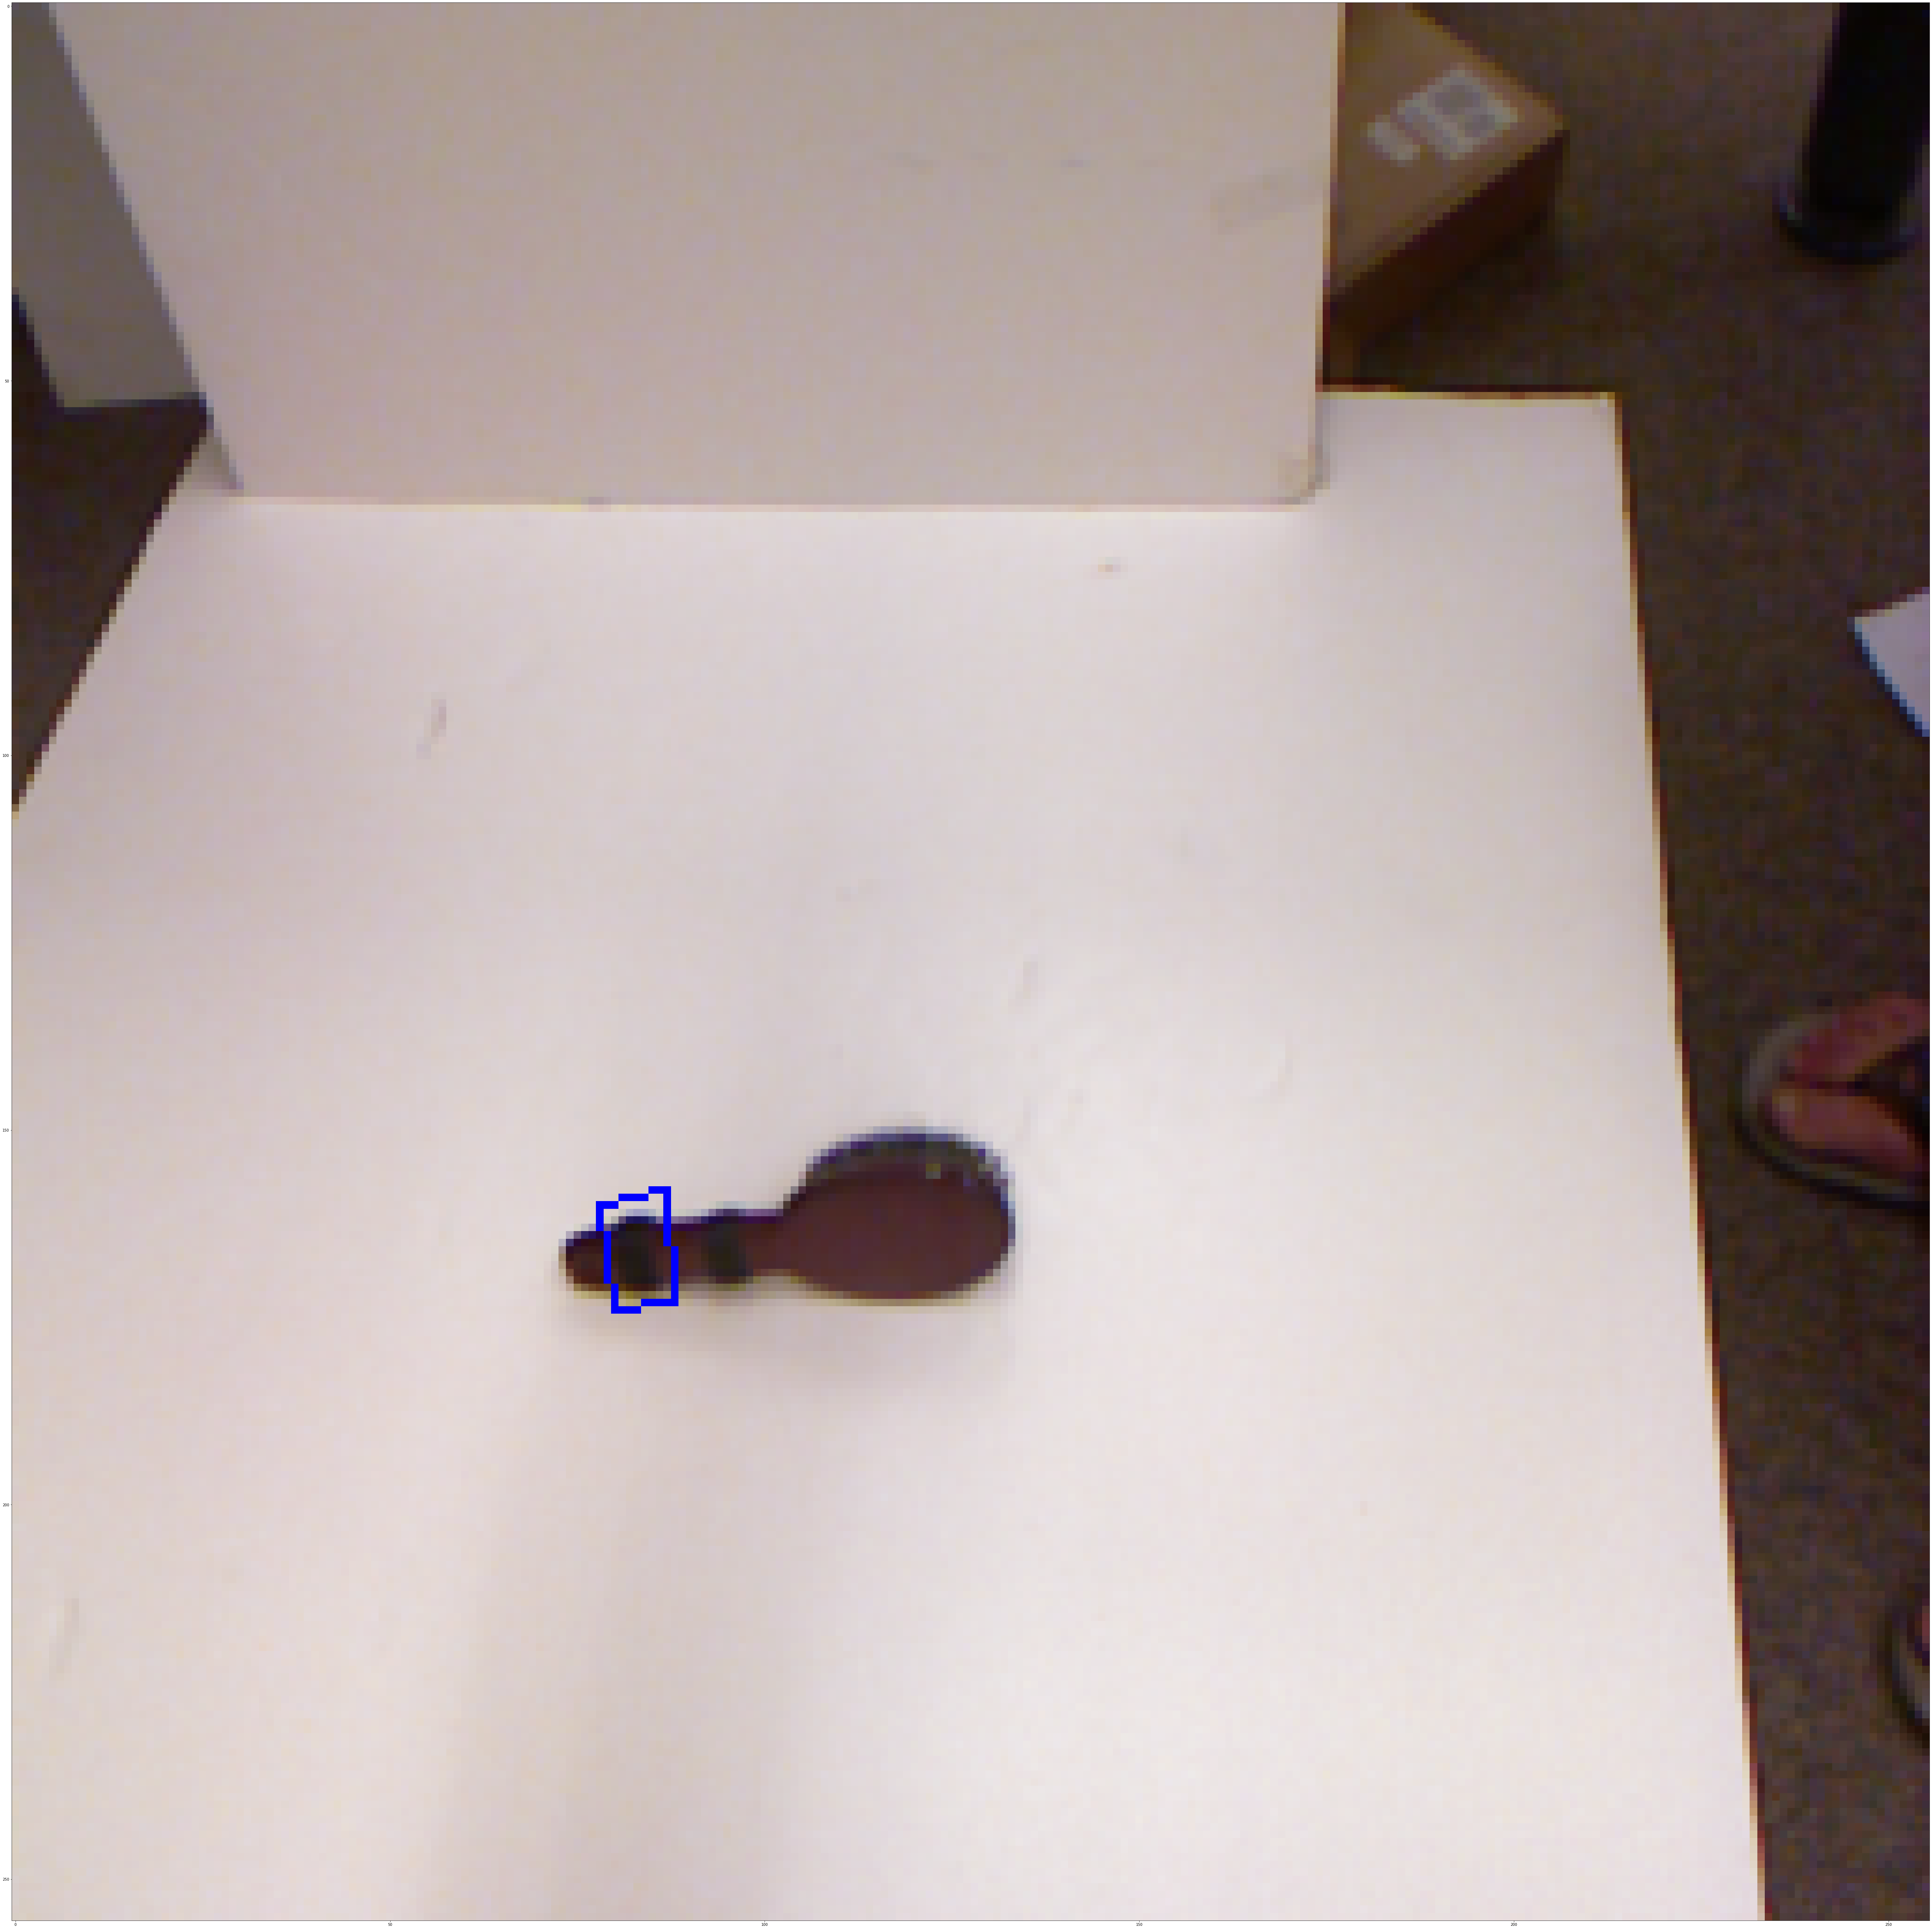

In [3]:
show_img_label(img_r,label_r)

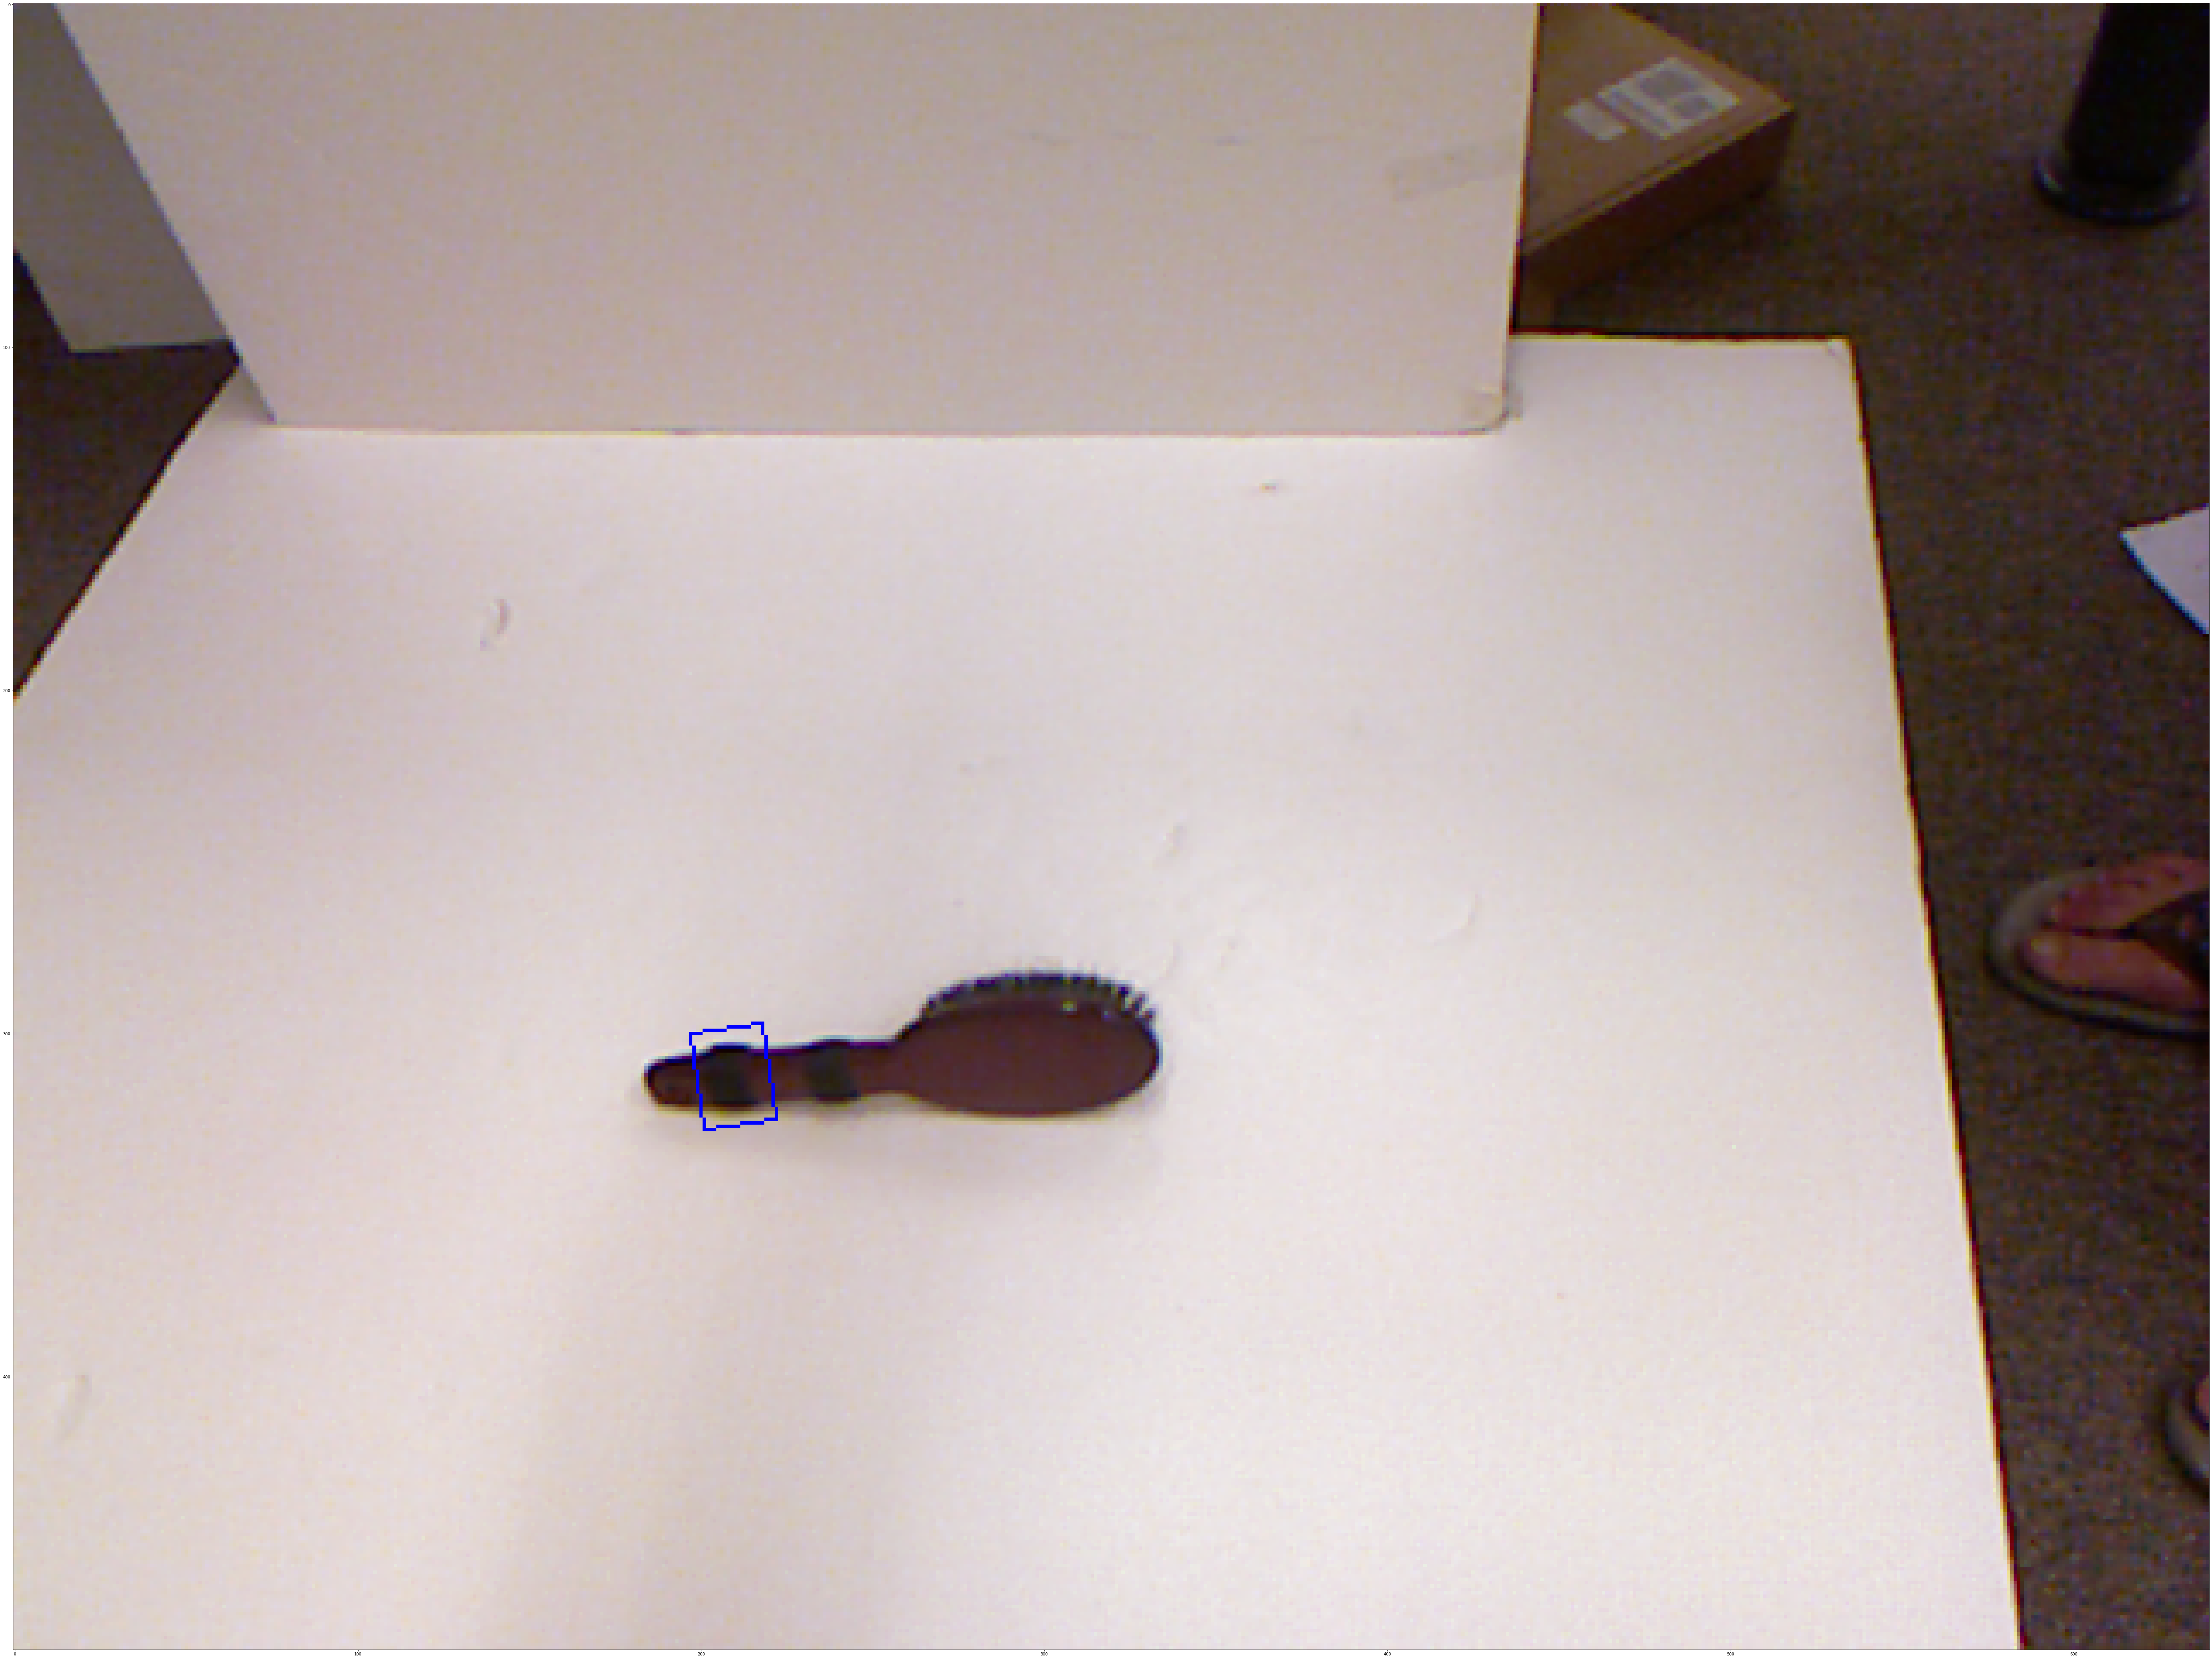

In [4]:
show_img_label(img, label)


In [5]:
x = torch.tensor([1, 2, 3])

In [6]:
len(x)

3